In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('taxi_trip_pricing.csv')

In [3]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [5]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [6]:
numeric_columns = df.select_dtypes(include=['Float64',"int64"]).columns
categorical_columns = df.select_dtypes(include=['object']).columns

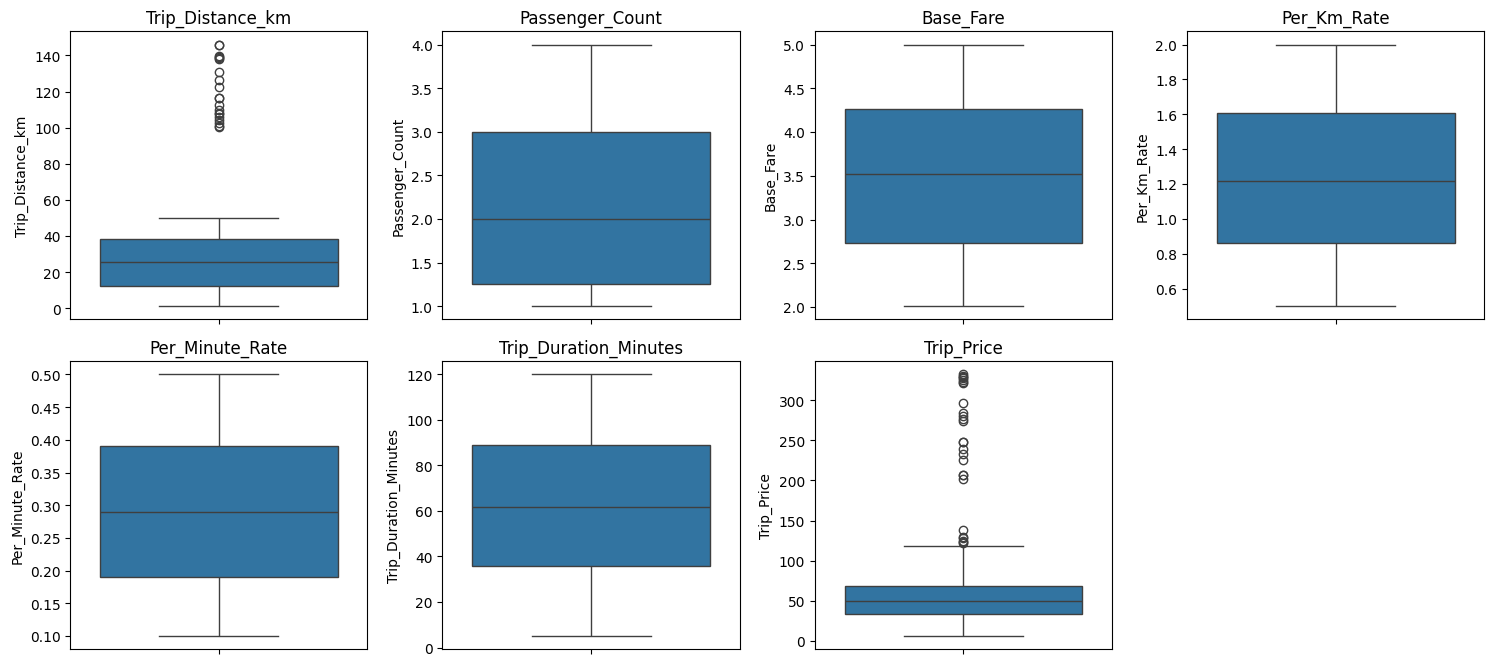

In [7]:
# Checked for outliers in numerical columns using boxplots before filling missing values

plt.figure(figsize=(15,10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3,4,i)
    sns.boxplot(y=df[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

In [8]:
# Filled missing values with the median for columns with heavy outliers (Trip_Distance_km, Trip_Price)
heavy_outliers = ['Trip_Distance_km','Trip_Price']
for col in heavy_outliers:
    df[col].fillna(df[col].median(), inplace=True)

In [9]:
# Applied mean imputation to columns without heavy outliers (Trip_Duration_Minutes, Base_Fare, Per_Km_Rate, Per_Minute_Rate, Passenger_Count)
clean_cols = ['Trip_Duration_Minutes', 'Base_Fare', 'Per_Km_Rate', 
              'Per_Minute_Rate', 'Passenger_Count']
for col in clean_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [10]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,50.0745
2,36.87,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.480000,0.51,0.15,116.81,36.4698
4,25.83,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.6180


In [11]:
categorical_columns

Index(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object')

In [12]:
# Filled missing values in categorical columns with the mode (most frequent value)
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

Heavy outliers → Median

No/Low outliers → Mean

Categorical → Mode

In [14]:
df.tail()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.620000,0.490000,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.610000,0.292916,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.780000,0.292916,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.820000,0.170000,114.94,61.2090
999,22.85,Morning,Weekend,3.0,Medium,Clear,4.34,1.233316,0.230000,29.69,45.4437


In [15]:
df['Time_of_Day'].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [16]:
df['Day_of_Week'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [17]:
df['Traffic_Conditions'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [18]:
df['Weather'].unique()

array(['Clear', 'Rain', 'Snow'], dtype=object)

In [19]:
# One Hot Encoding with pandas get_dummies
df = pd.get_dummies(df, columns=['Time_of_Day'], drop_first=True) 

In [20]:
# Converted 'Day_of_week' column into binary values (Weekday=1, Weekend=0)
df['Day_of_Week'] = df['Day_of_Week'].replace({"Weekday":1, "Weekend":0})

In [21]:
df["Traffic_Conditions"].value_counts()

Traffic_Conditions
Low       447
Medium    371
High      182
Name: count, dtype: int64

In [22]:
# Converted 'Traffic_conditions' column into numeric values using Ordinal Encoding
df["Traffic_Conditions"] = df["Traffic_Conditions"].replace({"Low":0, "Medium":1, "High":2})

In [23]:
# Applied One Hot Encoding to 'Weather' column
df = pd.get_dummies(df, columns=['Weather'], drop_first=True)

In [24]:
df.head()

,Trip_Distance_km,Day_of_Week,Passenger_Count,Traffic_Conditions,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Weather_Rain,Weather_Snow
0,19.35,1,3.0,0,3.560000,0.80,0.32,53.82,36.2624,False,True,False,False,False
1,47.59,1,1.0,2,3.502989,0.62,0.43,40.57,50.0745,False,False,False,False,False
2,36.87,0,1.0,2,2.700000,1.21,0.15,37.27,52.9032,True,False,False,False,False
3,30.33,1,4.0,0,3.480000,0.51,0.15,116.81,36.4698,True,False,False,False,False
4,25.83,1,3.0,2,2.930000,0.63,0.32,22.64,15.6180,True,False,False,False,False


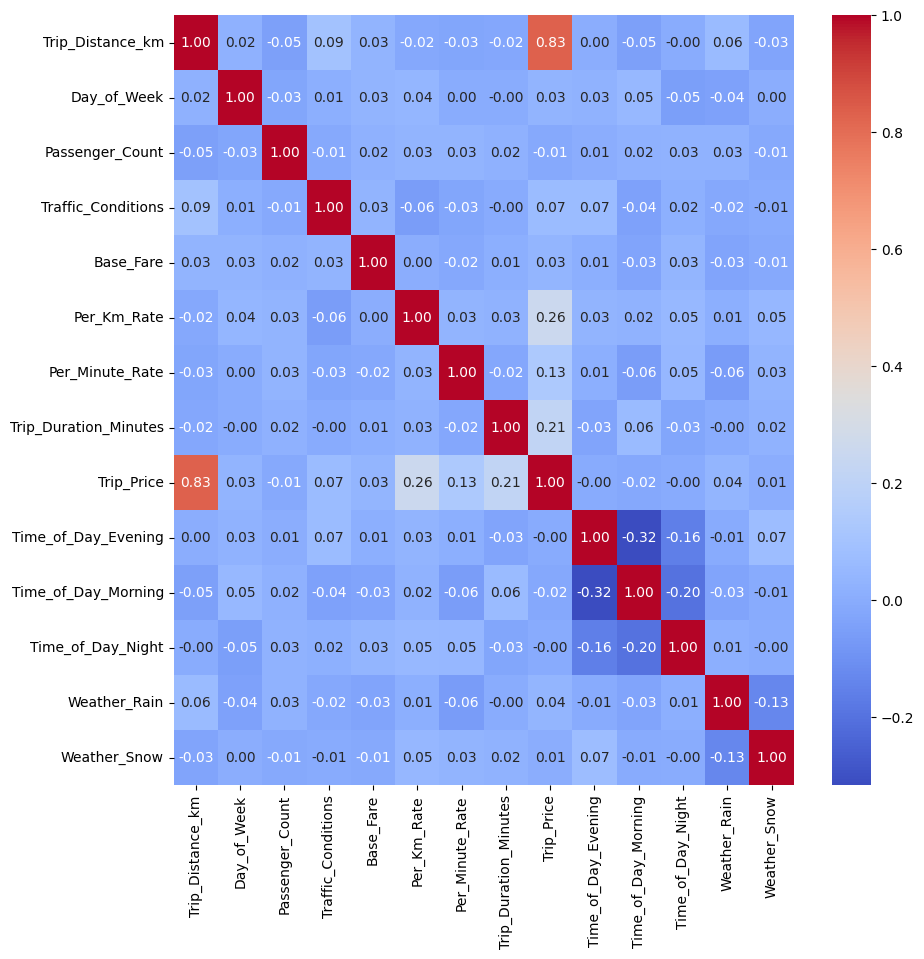

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

In [26]:
# dependent - independent features

X = df.drop('Trip_Price', axis=1)
y = df['Trip_Price']

In [27]:
X.head()

,Trip_Distance_km,Day_of_Week,Passenger_Count,Traffic_Conditions,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Weather_Rain,Weather_Snow
0,19.35,1,3.0,0,3.560000,0.80,0.32,53.82,False,True,False,False,False
1,47.59,1,1.0,2,3.502989,0.62,0.43,40.57,False,False,False,False,False
2,36.87,0,1.0,2,2.700000,1.21,0.15,37.27,True,False,False,False,False
3,30.33,1,4.0,0,3.480000,0.51,0.15,116.81,True,False,False,False,False
4,25.83,1,3.0,2,2.930000,0.63,0.32,22.64,True,False,False,False,False


In [28]:
y.head()

0    36.2624
1    50.0745
2    52.9032
3    36.4698
4    15.6180
Name: Trip_Price, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=15)

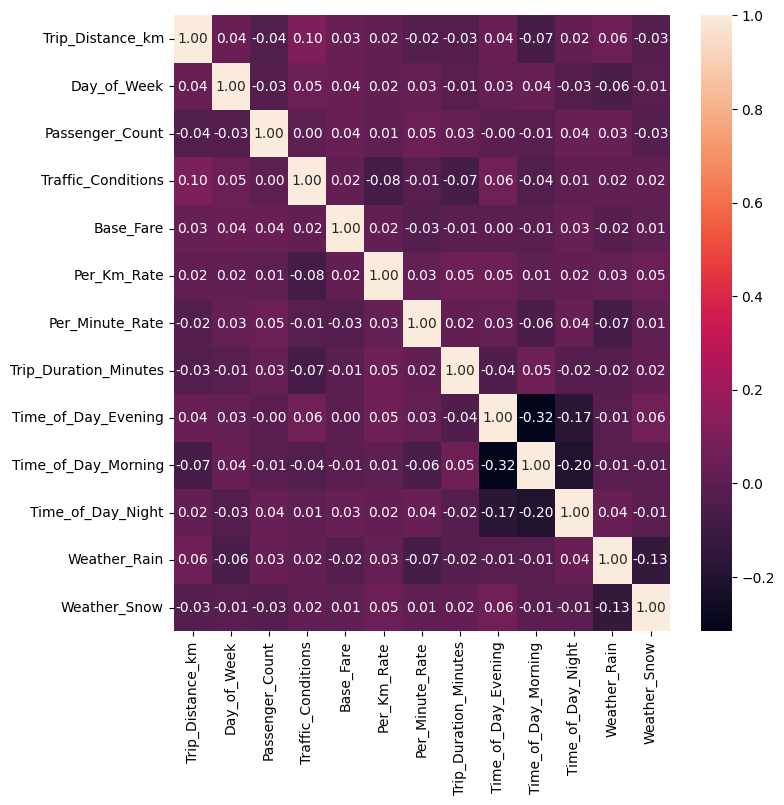

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(X_train.corr(), annot=True, fmt=".2f")
plt.show()

In [32]:
# Checked multicollinearity among features in X_train using a heatmap.
# The heatmap shows that all feature correlations are very low, with the highest correlation being close to 0.
# Therefore, there is no need to drop any features due to multicollinearity.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared: ", mse)
print("R2 Score: ",score)

Mean Absolute Error:  10.089013096561168
Mean Squared:  214.07301327656117
R2 Score:  0.8183774840019342


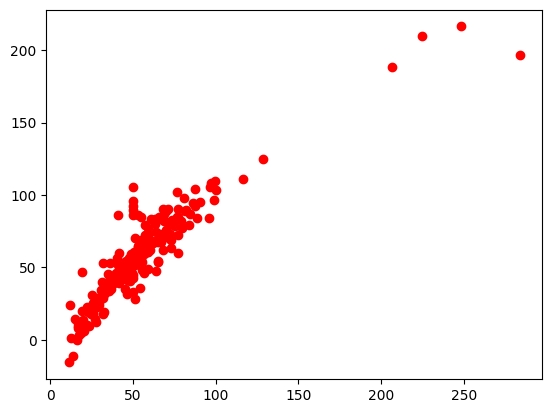

In [39]:
plt.scatter(y_test,y_pred, color="red")
plt.show()

In [40]:
from sklearn.linear_model import Lasso
lasso = Lasso()

Mean Absolute Error:  9.507399170510107
Mean Squared:  205.96740952553517
R2 Score:  0.8252543907376879


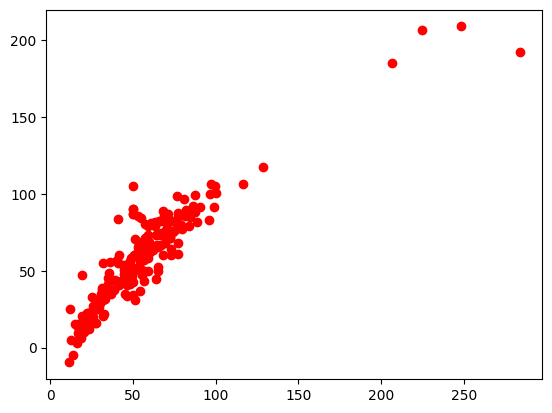

In [41]:
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared: ", mse)
print("R2 Score: ",score)

plt.scatter(y_test, y_pred , color="red")
plt.show()

Mean Absolute Error:  10.074787474858063
Mean Squared:  213.81015555231454
R2 Score:  0.8186004961438968


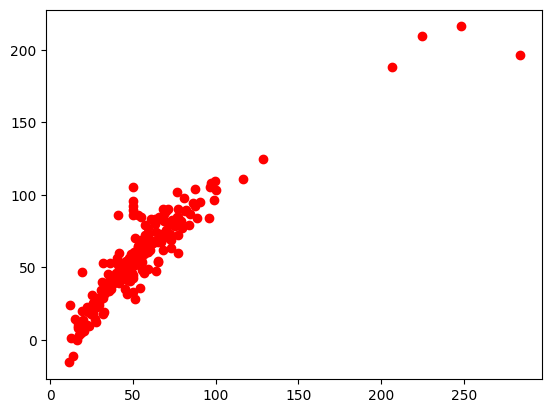

In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared: ", mse)
print("R2 Score: ",score)

plt.scatter(y_test, y_pred , color="red")
plt.show()


Mean Absolute Error:  9.91741927036228
Mean Squared:  287.34577558532163
R2 Score:  0.7562118553645089


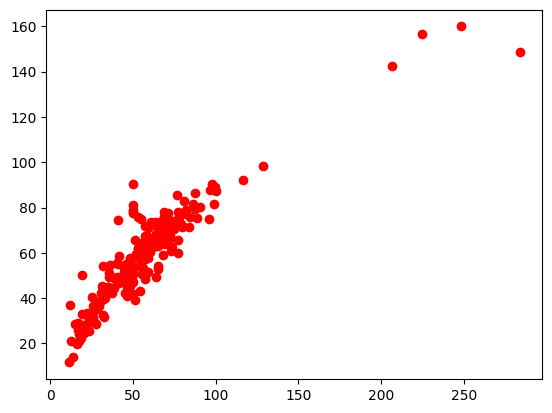

In [43]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()

elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared: ", mse)
print("R2 Score: ",score)

plt.scatter(y_test, y_pred , color="red")
plt.show()

In [44]:
# Lasso Cross Validation

Mean Absolute Error:  9.715388611227908
Mean Squared:  208.1499374633869
R2 Score:  0.8234027037396796


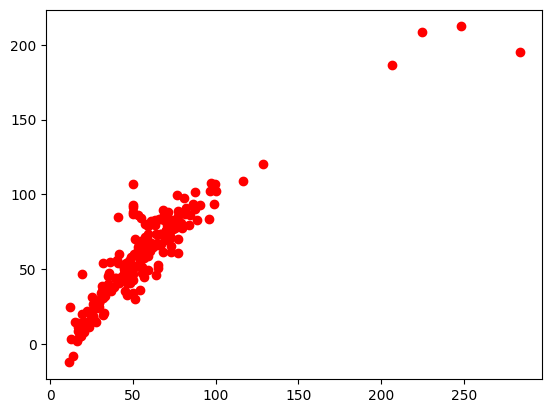

In [45]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)

lassocv.fit(X_train, y_train)
y_pred = lassocv.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared: ", mse)
print("R2 Score: ",score)

plt.scatter(y_test, y_pred , color="red")
plt.show()

In [46]:
lassocv.alpha_

np.float64(0.4792663645256294)

Mean Absolute Error:  9.950710766934948
Mean Squared:  211.64483004924958
R2 Score:  0.8204375883574462


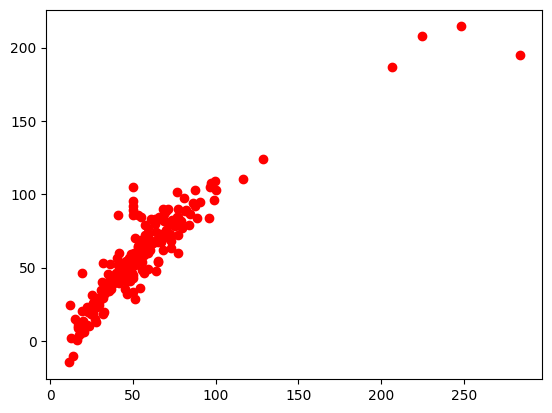

In [47]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)

ridgecv.fit(X_train, y_train)
y_pred = ridgecv.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared: ", mse)
print("R2 Score: ",score)

plt.scatter(y_test, y_pred , color="red")
plt.show()

Mean Absolute Error:  9.71801145375522
Mean Squared:  208.07311523485697
R2 Score:  0.8234678807847289


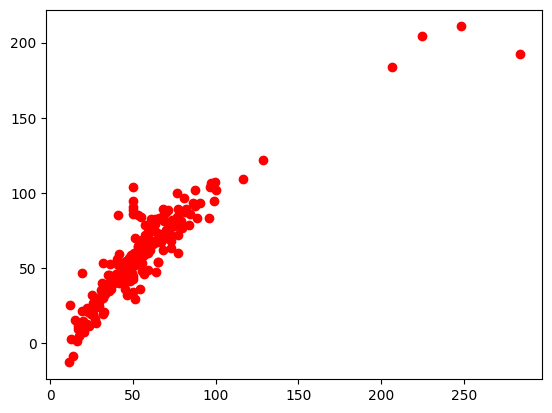

In [48]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv = ElasticNetCV(cv=5)

elastic_net_cv.fit(X_train, y_train)
y_pred = elastic_net_cv.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean Absolute Error: ", mae)
print("Mean Squared: ", mse)
print("R2 Score: ",score)

plt.scatter(y_test, y_pred , color="red")
plt.show()

In [49]:
elastic_net_cv.alphas_

array([67.62258912, 63.06505294, 58.81467944, 54.85076689, 51.15400878,
       47.7063998 , 44.49114812, 41.49259364, 38.6961317 , 36.08814194,
       33.65592195, 31.38762546, 29.27220455, 27.29935593, 25.45947071,
       23.7435876 , 22.14334926, 20.65096163, 19.25915593, 17.96115328,
       16.75063166, 15.62169515, 14.56884518, 13.58695378, 12.67123857,
       11.8172395 , 11.02079711, 10.27803227,  9.58532729,  8.93930831,
        8.33682885,  7.77495449,  7.25094858,  6.76225891,  6.30650529,
        5.88146794,  5.48507669,  5.11540088,  4.77063998,  4.44911481,
        4.14925936,  3.86961317,  3.60881419,  3.3655922 ,  3.13876255,
        2.92722046,  2.72993559,  2.54594707,  2.37435876,  2.21433493,
        2.06509616,  1.92591559,  1.79611533,  1.67506317,  1.56216952,
        1.45688452,  1.35869538,  1.26712386,  1.18172395,  1.10207971,
        1.02780323,  0.95853273,  0.89393083,  0.83368289,  0.77749545,
        0.72509486,  0.67622589,  0.63065053,  0.58814679,  0.54

In [50]:
# ===============================================
# Model Performance Summary (R² Scores)
# ===============================================

# Baseline Linear Regression
# - R² Score: 0.818
# - Linear Regression provides a solid baseline performance on this dataset.

# Regularized Regression
# - Lasso: 0.825
# - Ridge: 0.818
# - ElasticNet: 0.75
# - Interpretation:
#   - Ridge and Lasso give similar results → features are not highly correlated.
#   - ElasticNet slightly lower → L1+L2 combination may have shrunk some features unnecessarily.

# Cross-Validated Performance (CV=5)
# - LassoCV: 0.823
# - RidgeCV: 0.8204
# - ElasticNetCV: 0.823
# - Interpretation:
#   - Cross-validation confirms performance is stable across splits.
#   - Differences are minimal → Linear Regression, Ridge, and Lasso are already well-suited for this dataset.
#   - ElasticNetCV performs similarly to LassoCV after tuning alpha.


| Model             | R² (Train/Test) | CV R² (5-fold) | Comment                              |
| ----------------- | --------------- | -------------- | ------------------------------------ |
| Linear Regression | 0.818           | -              | Good baseline                        |
| Lasso             | 0.825           | 0.823          | Slight improvement, stable           |
| Ridge             | 0.818           | 0.8204         | Similar to baseline                  |
| ElasticNet        | 0.75            | 0.823          | After CV tuning, performs like Lasso |